In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib inline


# Load saved data
os.chdir('C:\\Users\\drose\\Google Drive\\mooc\\Udacity\\sdc\\p3\\Autonomous-Driving-Simulation')    
images        = np.load('images_v2.npy')
measurements  = np.load('measurements_v2.npy')


(160, 320, 3)
x_train shape:  (29464, 160, 320, 3)
y_train shape:  (29464,)
The average steering angle in the dataset is:  0.00018860625


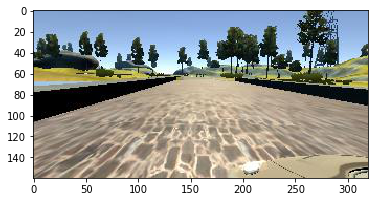

In [2]:
plt.imshow(images[0])
print(np.shape(images[2]))

x_train = np.array(images)
y_train = np.array(measurements)

print('x_train shape: ',np.shape(x_train))
print('y_train shape: ',np.shape(y_train))

print('The average steering angle in the dataset is: ',np.mean(y_train))

In [ ]:
from keras.models import Sequential
from keras.models import save_model
from keras.layers import Flatten,Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Cropping2D
from keras.layers import Lambda, Input, Reshape, AveragePooling2D
from keras import optimizers
from keras.callbacks import History 
history = History()
import h5py
import keras
from keras.backend import tf as ktf


model = Sequential()
#model.add(Reshape((80, 160), input_shape=(160,320)))
# Resize Images
#model.add(Lambda(lambda x: ktf.image.resize_images(x, (80, 160)), input_shape=(160, 320, 3), output_shape=(80, 160,3)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, data_format='channels_last', input_shape=(160,320,3)))
# Normalize values
model.add(Lambda(lambda x: x/255 - .5))
model.add(Cropping2D(cropping=((25, 15), (0, 0)), input_shape=(80, 160, 3)))
#model.add(Convolution2D(32,1,1))
#model.add(Activation('relu'))
model.add(Convolution2D(16,1,1))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
#model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(10))
model.add(Dense(1))
#model.add(Activation('tanh'))

#sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
opt = keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mse', optimizer=opt)
model.fit(x_train, y_train, validation_split = 0.3, shuffle=True, batch_size=32, epochs=8,callbacks=[history])    

model.save('train_v14.h5')

Using TensorFlow backend.
C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`


Train on 20624 samples, validate on 8840 samples
Epoch 1/8
20624/20624 [==============================] - 51s - loss: 0.0634 - val_loss: 0.0285
Epoch 2/8
20624/20624 [==============================] - 47s - loss: 0.0338 - val_loss: 0.0276
Epoch 3/8
20624/20624 [==============================] - 47s - loss: 0.0305 - val_loss: 0.0272s: 0.03
Epoch 4/8
20624/20624 [==============================] - 47s - loss: 0.0294 - val_loss: 0.0263
Epoch 5/8
20624/20624 [==============================] - 47s - loss: 0.0292 - val_loss: 0.0262
Epoch 6/8
20624/20624 [==============================] - 47s - loss: 0.0284 - val_loss: 0.0261
Epoch 7/8
20624/20624 [==============================] - 45s - loss: 0.0283 - val_loss: 0.0259
Epoch 8/8
20624/20624 [==============================] - 45s - loss: 0.0282 - val_loss: 0.0254


(array([  1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   4.00000000e+00,   2.10000000e+01,
          9.00000000e+00,   3.80000000e+01,   4.00000000e+01,
          6.40000000e+01,   9.30000000e+01,   2.43000000e+02,
          4.48000000e+02,   5.28000000e+02,   1.26500000e+03,
          7.53500000e+03,   1.76800000e+03,   4.55500000e+03,
          1.59200000e+03,   7.95200000e+03,   1.15900000e+03,
          1.13700000e+03,   3.97000000e+02,   2.61000000e+02,
          1.29000000e+02,   6.70000000e+01,   7.60000000e+01,
          1.90000000e+01,   1.90000000e+01,   1.80000000e+01,
          1.00000000e+01,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([-1.6631142 , -1.56940157, -1.47568895, -1.38197632, -1.2882637 ,
        -1.19455107, -1.10083845, -1.00712582, -0.9134132 , -0.81970057,
        -0.72598795,

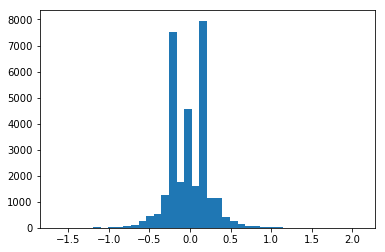

In [ ]:
from skimage import io, color, exposure, transform
"""
IMG_SIZE = 32
images_32 = []
for image in x_train:
    img = transform.resize(image, (32, 32))
    images_32.append(img)"""

plt.hist(y_train, bins = 40)

## Train Keras

In [ ]:
history.history['loss'][1:]

[0.033769619255922763,
 0.030542635670996757,
 0.029419398305199237,
 0.029195555190276137,
 0.028413473837990876,
 0.02828754856965748,
 0.028206311010223105]

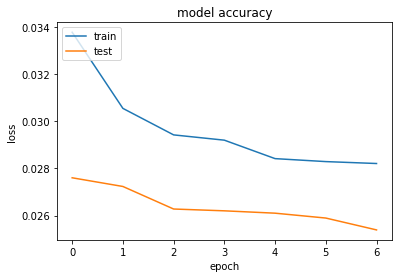

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()